<a href="https://colab.research.google.com/github/kiran9615/task_3_EDA_on_Sample_Superstore/blob/main/task_3_EDA_on_Sample_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

##**GRIP MARCH 22 (Data Science and Business Analytics)**

###**Task 3 - Exploratory data Analysis - Retail**

###**Author - Kiran Mahara**

###**Objective :**

* Perform Exploratory Data Analysis on dataset **Sample Superstore**
* As a Business Manager, try to find out the weak areas where you can work to make more profit
* To find all Business problems by exploring the data

#**Exploratory Data Analysis**

In [1]:
#importing all the necessary modules required during the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Link to download dataset : https://bit.ly/3i4rbWl**

In [4]:
#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#reading samplesuperstore csv data and storing it in superstore_df dataframe
file_path='/content/drive/MyDrive/Datascience/Sparks foundation provided datasets/SampleSuperstore.csv'
superstore_df=pd.read_csv(file_path)

# ***Part 1: Basic Data preprocessing and cleaning***

In [6]:
#----------------------Block 1----------------------------------

#checking for the number of observations and features in the dataset
superstore_df.shape

(9994, 13)

So, the data has 9994 observations with 13 different features.

In [7]:
#----------------------Block 2----------------------------------

#visualising first five observations from the dataset
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##*Data Dictionary*

*Ship Mode - Mode of shipping used for shipment delivery*

*Segment - Customer segment product was shipped to*

*Country - Country in which the shipment was delivered*

*City - City in which the shipment was delivered*

*State - State in which the shipment was delivered*

*Postal Code - Pin code of the place where shipment was delivered*

*Region - Country region (East, West, North, South)*

*Category - The category product belongs to*

*Sub-Category - Sub category of the product*

*Sales - Sales made in US dollar*

*Quantity - Quantity of the product delivered*

*Discount - Discount on the product*

*Profit - Profit from the shipment*

In [8]:
#----------------------Block 3----------------------------------

#checking basic info about features
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:

#----------------------Block 4----------------------------------

#checking for null values in the data
superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

*So, there are no any null values in the data.*

In [10]:
#----------------------Block 5----------------------------------

superstore_df.duplicated().sum() #checking for duplicate observations

17

So, there are 17 dublicate observations in the given dataset

In [11]:
#----------------------Block 6----------------------------------

#Dropping the duplicated rows
superstore_df.drop_duplicates(inplace = True)

In [13]:
#----------------------Block 7----------------------------------

features_subset=['Ship Mode','Segment','Country','Region','Category','Sub-Category','Discount'] #defining list of columns as features_subset
for col in features_subset:
  print(f"Unique categories of {col}:\n\n",superstore_df[col].value_counts()) #printing value counts for each category for features of features_subset
  print("\n-----------------------------------------------------")

Unique categories of Ship Mode:

 Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

-----------------------------------------------------
Unique categories of Segment:

 Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

-----------------------------------------------------
Unique categories of Country:

 United States    9977
Name: Country, dtype: int64

-----------------------------------------------------
Unique categories of Region:

 West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

-----------------------------------------------------
Unique categories of Category:

 Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

-----------------------------------------------------
Unique categories of Sub-Category:

 Binders        1522
Paper          1359
Furnishings     956
Phones        

*From above we observed that:*
* *Most preferred ship mode is standard class and least preferred is same day. Possible reason could be that standard class is cheapest one and same class is expensive one.*
* *Consumer segment has most number of shipment while home office has minimum.*
* *West region has most of the shipment followed by east.*
* *Office supplies is most ordered category.*
* *Discount on products is within the range of 0 to 80 percent.*

**We have only one country US in our data,and it's of no any use for analysis, so we can drop it.**

In [ ]:
#----------------------Block 8----------------------------------

#dropping feature Country
superstore_df.drop(columns='Country',inplace=True)
superstore_df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#----------------------Block 9----------------------------------

superstore_df[['Sales','Profit']].describe() #checking for statistical summary of sales and profit features

,Sales,Profit
count,9977.000000,9977.00000
mean,230.148902,28.69013
std,623.721409,234.45784
min,0.444000,-6599.97800
25%,17.300000,1.72620
50%,54.816000,8.67100
75%,209.970000,29.37200
max,22638.480000,8399.97600


*We can see that, both Sales and Profit column has outliers*

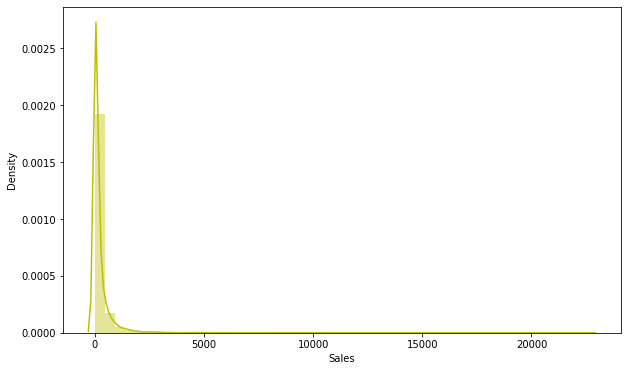

In [23]:
#----------------------Block 10----------------------------------

#visualising observation found in block 9
plt.rcParams['figure.figsize']=(10,6) #defining figure
sns.distplot(superstore_df['Sales'],color='y') #distplot for sales column

*distribution plot for sales column is highly right skewed due to outliers, most of the values for sales under 2000, so let's take 2000 as threshold for sales for EDA.*

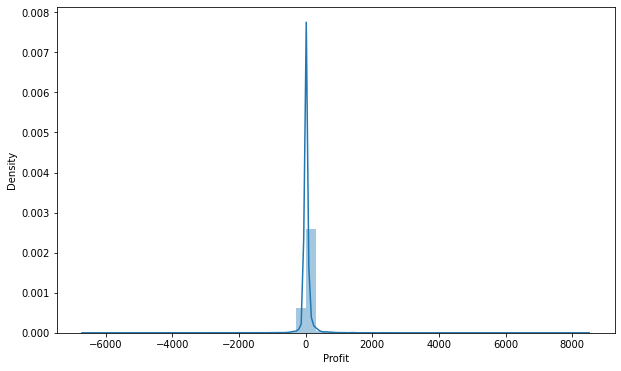

In [17]:
#----------------------Block 11----------------------------------

#visualising observation found on block 9
sns.distplot(superstore_df['Profit']) #distplot for profit column

*distribution plot for profit column is normally distributed, but there is presence of so many outliers in it, most of profit values in between -1000 to 1000, so let's make this as threshold for profit column for EDA.*

In [18]:
#----------------------Block 12----------------------------------

#creating a new dataframe with values of sales and profit under threshold
updated_superstore_df=superstore_df[(superstore_df['Sales']<2000)] #to choose rows where sales value is under threshold
updated_superstore_df=updated_superstore_df[(superstore_df['Profit']<1000) & (-1000< superstore_df['Profit'])] #to choose rows where profit value is under threshold
updated_superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
#----------------------Block 13----------------------------------

updated_superstore_df.shape #checking for the shape of updated dataframe

(9825, 13)

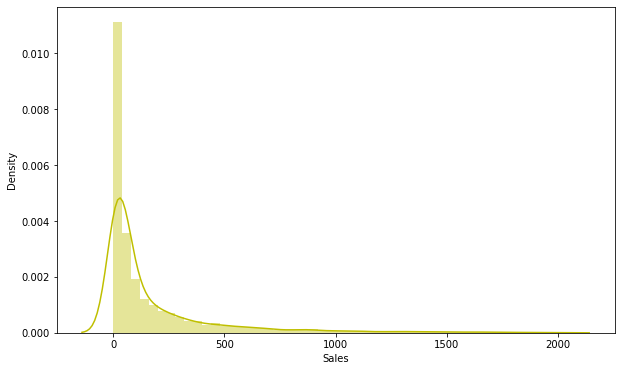

In [22]:
#----------------------Block 14----------------------------------

sns.distplot(updated_superstore_df['Sales'],color='y') #distplot of sales for updated observations

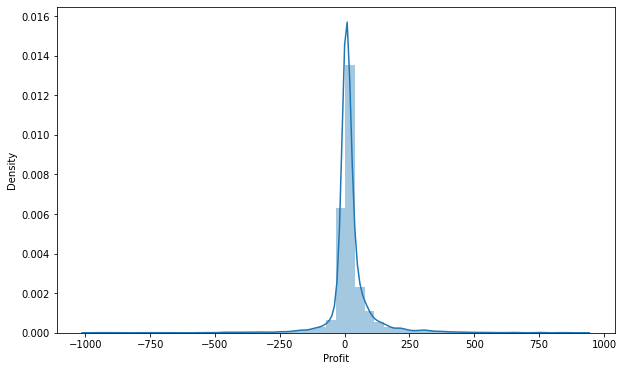

In [24]:
#----------------------Block 15----------------------------------

sns.distplot(updated_superstore_df['Profit']) #distplot of profit for updated observations

*From blocks 14 and 15 we can see, there is still presence of some outliers but it is managable.*

#**Part 2: Feature analysis**

##**Visualising and analysing about how ship mode, segment are related to sales and profit**

###**How does average sales and average profit varying across each ship mode?**

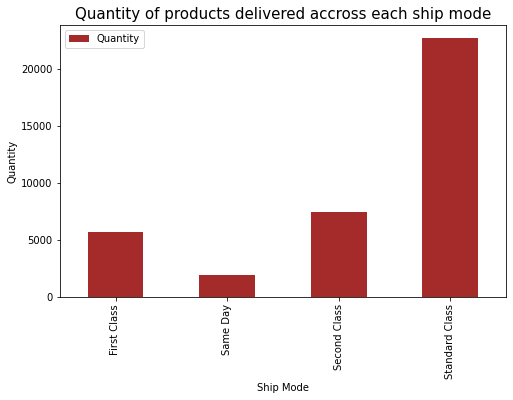

In [104]:
#----------------------Block 16----------------------------------

#visualising shipment across different ship modes
plt.rcParams['figure.figsize']=(8,5) #defining figure
superstore_df.groupby('Ship Mode').agg({'Quantity':'sum'}).plot.bar(color='brown') #bar plot for product delivered accross each ship mode
plt.title('Quantity of products delivered accross each ship mode',fontsize=15) #to set title for the plot
plt.ylabel('Quantity')  #to set label for y-axis
plt.show() #to show the graph

In [105]:
#----------------------Block 17----------------------------------

#grouping by ship mode and finding average of sales and profit in updated superstore dataframe
ship_mode_avg_price_df=updated_superstore_df.groupby('Ship Mode').agg({'Sales':'mean','Profit':'mean'}).sort_values(by='Profit',ascending=False)
ship_mode_avg_price_df.rename(columns={'Profit':'Avg profit in USD','Sales':'Avg sales in USD'},inplace=True) #renaming the profit and sales column
ship_mode_avg_price_df

,Avg sales in USD,Avg profit in USD
Ship Mode,,
Same Day,184.738298,25.230473
Second Class,182.888890,24.264646
Standard Class,175.218066,19.964266
First Class,173.581209,19.636760


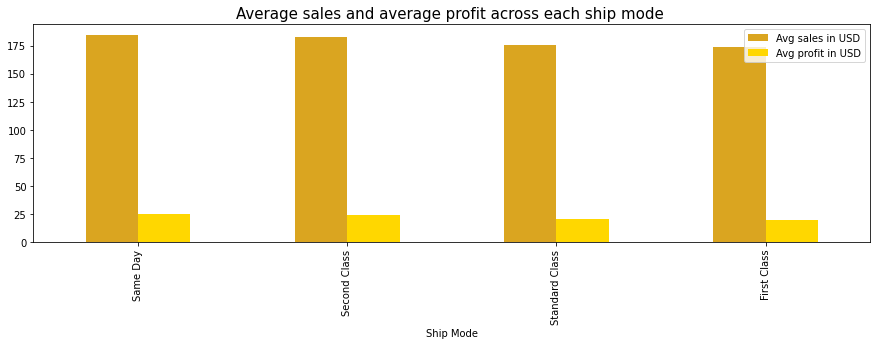

In [106]:
#----------------------Block 18----------------------------------

#visualising the above observation
plt.rcParams['figure.figsize']=(15,4) #defining figure
ship_mode_avg_price_df.plot.bar(color=['goldenrod','gold']) #bar plot for average sales and profit accross each ship mode
plt.title('Average sales and average profit across each ship mode ',fontsize=15) 
plt.show() 

*Though standard class is most preferrable and same day is least but average profit and average sales for Same Day mode of shipment is maximum, the possible reason for this could be its high cost due to which instead of having a few customers, sales and profit is high.*



###**How does average sales and average profit varying across each segment?**

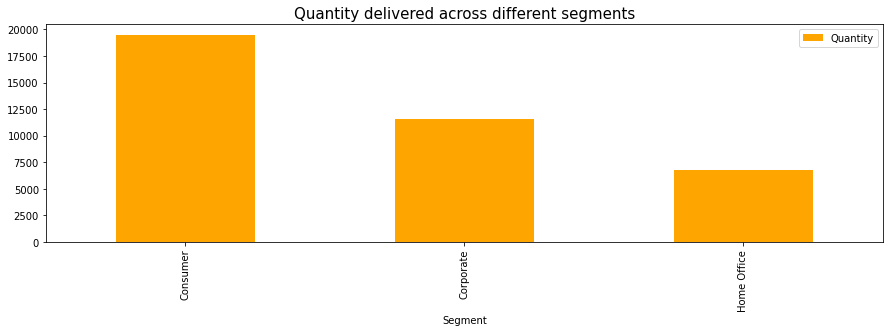

In [107]:
#----------------------Block 19----------------------------------

#visualising shipment across different segments
superstore_df.groupby('Segment').agg({'Quantity':'sum'}).plot.bar(color='orange')  #bar plot for quantity delivered across different segments
plt.title('Quantity delivered across different segments',fontsize=15)
plt.show()

In [108]:
#----------------------Block 20----------------------------------

segment_sales_profit_df=updated_superstore_df.groupby('Segment').agg({'Sales':'mean','Profit':'mean'}) #grouping by segment and finding average of sales and profit
segment_sales_profit_df.rename(columns={'Profit':'Avg profit','Sales':'Avg sales in USD'},inplace=True) #renaming the column
segment_sales_profit_df

,Avg sales in USD,Avg profit
Segment,,
Consumer,173.312435,20.110355
Corporate,184.847777,20.863108
Home Office,174.293968,24.046988


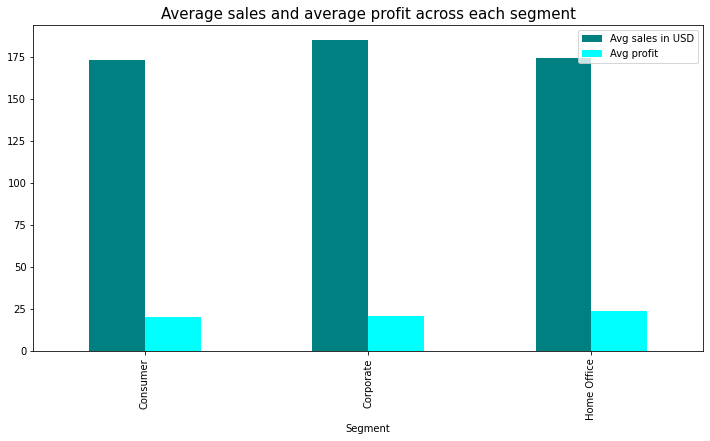

In [109]:
#----------------------Block 21----------------------------------

#visulising block 20 observation using bar plot
plt.rcParams['figure.figsize']=(12,6)  #defining figure
segment_sales_profit_df.plot.bar(color=['teal','cyan']) #bar plot for average sales and profit across each segment
plt.title('Average sales and average profit across each segment',fontsize=15)
plt.show()

*Though consumer segment has most no. of shipments but average sales for corporate is maximum and average profit for home office is maximum.*

* *Possible reason for this could be consumers order all the items from low cost to high cost, but corporate segment orders related products to company like machines, furnitures, office supplies(in bulk) which leads to high sales for this segment but high shipment charges may eat up its revenue leading to low profit.*
* *Home office customers are less b/c mostly people prefer to work in office rather than home, therefore sales is less for this segment but they mostly order products like furnitures, office supplies (in bulk) leading to good profit to the company.*


###**How does average sales and average profit varying across each segment and each ship mode?**

In [110]:
 #----------------------Block 22----------------------------------

#grouping by segment and ship mode and finding average of sales and profit
segment_avgsalesnprofit_df=updated_superstore_df.groupby(['Segment','Ship Mode']).agg({'Sales':'mean','Profit':'mean'}).reset_index() 
segment_avgsalesnprofit_df.rename(columns={'Profit':'Avg profit in USD','Sales':'Avg sales in USD'},inplace=True)
segment_avgsalesnprofit_df

,Segment,Ship Mode,Avg sales in USD,Avg profit in USD
0,Consumer,First Class,168.911083,22.102997
1,Consumer,Same Day,160.489965,22.829214
2,Consumer,Second Class,166.734080,20.843512
3,Consumer,Standard Class,177.917689,19.087434
4,Corporate,First Class,182.043937,19.759128
5,Corporate,Same Day,270.969216,23.325425
6,Corporate,Second Class,190.697884,24.221111
7,Corporate,Standard Class,178.281182,19.880710
8,Home Office,First Class,171.740511,12.582184
9,Home Office,Same Day,166.555697,34.065832


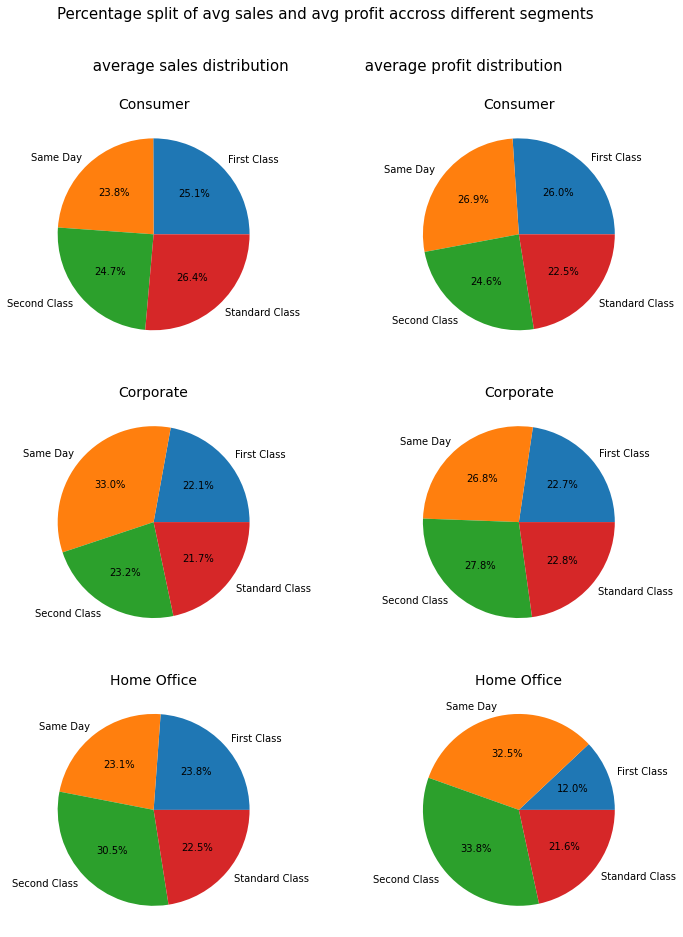

In [111]:
#----------------------Block 23----------------------------------

#visulaising observation of block 22
plt.rcParams['figure.figsize'] = (12, 15)
fig,axes=plt.subplots(3,2) #creating figure and multiple axes(here no. of axes=3*2=6)
#to give a main title to plots of all 6 axes
fig.suptitle('Percentage split of avg sales and avg profit accross different segments''\n\n\n average sales distribution                average profit distribution',fontsize=15)
segment_list=['Consumer','Corporate','Home Office'] #storing different segments in a list
label=['First Class','Same Day','Second Class','Standard Class'] #storing different ship modes in a list
#pie plot for average sales for each segment
m=0;j=0;k=3
for x in range(1):
      for y in range(3):
        axes[y,x].pie(segment_avgsalesnprofit_df.loc[j:k,'Avg sales in USD'],labels=label, autopct='%1.1f%%',radius=1) #plotting pie chart in each axes for average sales across each segment
        j=j+4;k=k+4
        axes[y,x].set_title(segment_list[m],fontsize=14) #setting title for pie plot of each axes
        m=m+1
#pie plot for average profit for each segment        
m=0;j=0;k=3  
for x in range(1,2):
      for y in range(3):
        axes[y,x].pie(segment_avgsalesnprofit_df.loc[j:k,'Avg profit in USD'],labels=label,autopct='%1.1f%%',radius=1) #plotting pie chart in each axes for average profit across each segment
        j=j+4;k=k+4
        axes[y,x].set_title(segment_list[m],fontsize=14)
        m=m+1  

*Though standard class has most no. of shipments but from block 22 and block 23, we can observe that :*
* *For consumer segment, maximum average sales is from standard class followed by first class and then second class but maximum profit is from Same day mode followed by first class.*
* *For corporate segment, maximum average sales is from same day but maximum profit is from second class followed by same day.*
* *For home office, maximum average sale is from second class & maximum profit is also from second class. Here sales from same day is comparatively less but profit from it is approximately same as of secondary class profit .*


